In [1]:
import requests
import json

from io  import BytesIO
from PIL import Image

In [2]:
# modified from https://github.com/longquanwu/huabei

#雪场照片
__api_snow_pack_list =                  'https://api.fenxuekeji.com/api/pw/photo_walls'
#雪场某天照片墙
__api_snow_pack_photo_walls_by_day =    'https://api.fenxuekeji.com/api/pw/photo_walls/%s/daily'
#雪场推荐照片墙
# __api_snow_pack_recommend_photo_walls = 'https://api.fenxuekeji.com/api/pw/photo_walls/%s/recommend_list'
#雪场每日列表
# __api_snow_pack_day_list =              'https://api.fenxuekeji.com/api/pw/photo_walls/%s/dailies'

page = 1

In [3]:
# 雪场列表
# params1 = {'able_type': 'ski_ranch', 'lat': 39.97696126302083, 'lng': 116.4195960828993, 'page': page}
params1 = {'able_type': 'ski_ranch', 'lat': 40.96534722000000, 'lng': 115.3931194000000, 'page': page}
data1 = requests.get(__api_snow_pack_list, params1)
ski_ranch_list = data1.json()['data']['photo_walls']

In [6]:
# 确认雪场
ski_ranch_list[2]['name']

'万龙度假天堂'

In [5]:
# 保存ID
uuid = ski_ranch_list[0]['uuid']

In [6]:
# 输入时间
date_string = '2019-03-31'
# 参数
time_type = {
        'a1': '10点前',
        'n1': '10~12点',
        'n2': '12~14点',
        'p1': '14点后'
}

params2 = {'apn': 'n1', 'datestring': date_string, 'device': 'pc', 'page': page}
data2 = requests.get(__api_snow_pack_photo_walls_by_day %uuid, params2)
meta_data = data2.json()['data']
photos = meta_data['photos']

In [7]:
img_url = photos[0]['image']['x1000']

In [8]:
image = Image.open(BytesIO(requests.get(img_url).content))

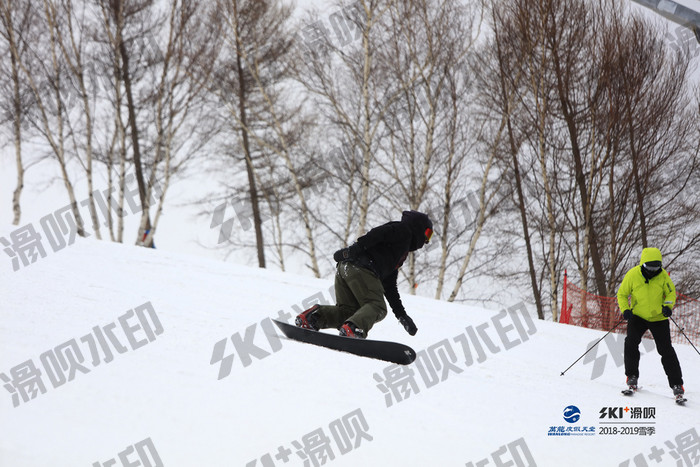

In [9]:
image

In [ ]:
print (img_url)